<a href="https://colab.research.google.com/github/arexdevson/Projeto_LIbrary/blob/main/FOOTBALL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#arquivo está no local : G:\Meu Drive\Registros\Geral\PycharmProjects\Football_Analysis

# Introdução


In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#carregando dataset
#G:\Meu Drive\Registros\Geral\PycharmProjects\Football_Analysis
df = pd.read_csv('/content/EPL_20_21.csv',sep=';',encoding='latin-1')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,"82,3",1,1,"0,21","0,24",2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,"84,6",0,0,0,0,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,"77,2",0,0,"0,41","0,21",2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,"78,6",0,0,"0,1","0,11",3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85,0,0,"0,06","0,12",3,0


# Análise Dados

In [ ]:
#tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   532 non-null    object
 1   Club                   532 non-null    object
 2   Nationality            532 non-null    object
 3   Position               532 non-null    object
 4   Age                    532 non-null    int64 
 5   Matches                532 non-null    int64 
 6   Starts                 532 non-null    int64 
 7   Mins                   532 non-null    int64 
 8   Goals                  532 non-null    int64 
 9   Assists                532 non-null    int64 
 10  Passes_Attempted       532 non-null    int64 
 11  Perc_Passes_Completed  532 non-null    object
 12  Penalty_Goals          532 non-null    int64 
 13  Penalty_Attempted      532 non-null    int64 
 14  xG                     532 non-null    object
 15  xA                     

In [ ]:
#quantidade de nulos
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [ ]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Penalty_Goals,Penalty_Attempted,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,0.191729,0.234962,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,0.850881,0.975818,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,0.000000,0.000000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,0.000000,0.000000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,9.000000,10.000000,12.000000,2.000000


In [ ]:
#creating 2 new columns - criando 2 novas colunas
#minutos minimos por partida que um jogador ficou jogando
df['MinsPerMatch'] = (df['Mins'] / df['Matches']).astype(int) 

df['GoalsPerMatch'] = (df['Goals']/df['Matches']).astype(float)

In [ ]:
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,"82,3",1,1,"0,21","0,24",2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,"84,6",0,0,0,0,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,"77,2",0,0,"0,41","0,21",2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,"78,6",0,0,"0,1","0,11",3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85,0,0,"0,06","0,12",3,0,74,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80,0,0,"0,22","0,1",0,0,26,0.000000
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,"77,9",0,0,0,0,0,0,90,0.000000
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100,0,0,0,0,0,0,12,0.000000
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100,0,0,"1,16",0,0,0,11,0.000000


In [ ]:
#total goals
total_goals = df['Goals'].sum()
print(total_goals)

986


In [ ]:
#penalty goals
total_penalty = df['Penalty_Goals'].sum()
print(total_penalty)

102


In [ ]:
#penalty attempts
total_penalty_attempts = df['Penalty_Attempted'].sum()
print(total_penalty_attempts)

125


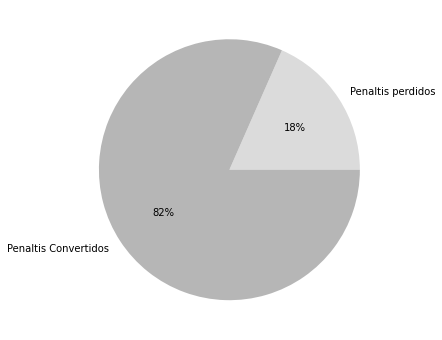

In [ ]:
#grafico de pizza para penaltis perdidos e convertido

plt.figure(figsize=(13,6))
pl_not_scored = total_penalty_attempts-total_penalty
data = [pl_not_scored,total_penalty]
labels = ['Penaltis perdidos','Penaltis Convertidos']
color = sns.color_palette('gist_gray_r')
plt.pie(data,labels=labels,colors = color,autopct='%.0f%%')
plt.show()

In [ ]:
#Unique positions - saber quais posições de jogador temos no dataset
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [ ]:
#total FW players - total de atacantes
#printando dados dos atacantes
df[df['Position'] == 'FW']


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,"77,2",0,0,"0,41","0,21",2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,"68,3",0,0,"0,56","0,07",0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,"74,2",0,0,"0,58","0,09",1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,"68,8",0,0,0,0,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,"85,4",0,1,"0,43","0,17",4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,"70,6",0,0,"0,17","0,13",2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,"62,9",0,0,"0,21","0,07",2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,"69,3",0,0,"0,14","0,13",1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,"69,9",2,2,"0,33","0,07",1,0,45,0.187500


In [ ]:
#players from different nations -contando numero unicos de jogadores de diferentes nações

np.size((df['Nationality'].unique()))

59

In [ ]:
#jogadores agrupados por pais, quantos jogadores temos de cada pais
#comando size conta o numero de elementos
nationality = df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head()

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
dtype: int64

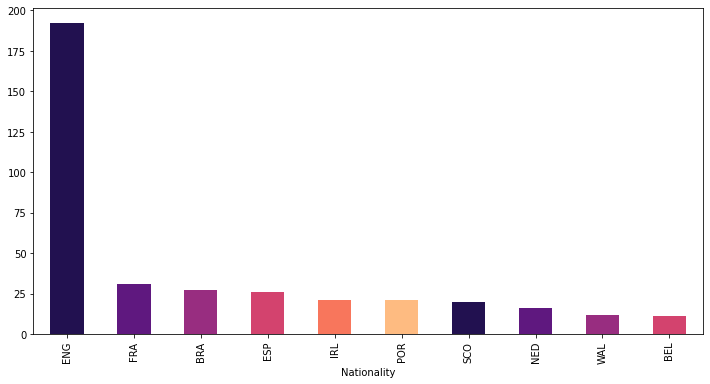

In [ ]:
#gráfico com os 10 maiores paises, por meio de uma barra, com tamanho e cor definida
nationality.head(10).plot(kind='bar',figsize=(12,6), color= sns.color_palette('magma'))

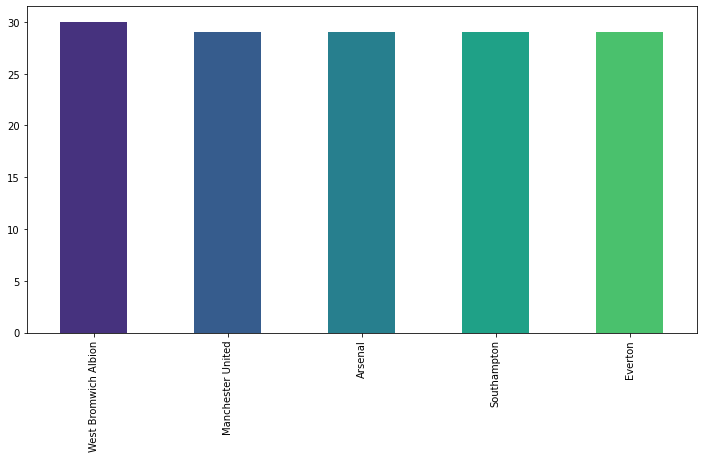

In [ ]:
  #clubs with maximum players in their squad
#contando cada jogador que participa do clube, e essa contagem ele traz dos 5 maiores
df['Club'].value_counts().nlargest(5).plot(kind='bar',figsize=(12,6),color=sns.color_palette('viridis'))

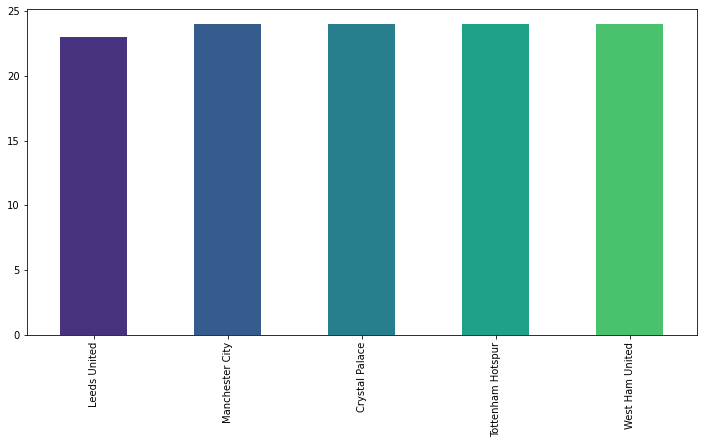

In [ ]:
#clubs with least players in their squad
#contando clubes com menos jogador que participa do clube, e essa contagem ele traz dos 5 menores
df['Club'].value_counts().nsmallest(5).plot(kind='bar',figsize=(12,6),color=sns.color_palette('viridis'))

In [ ]:
#player based on age group
abaixo20 = df[df['Age'] <=20]
age20_25 = df[(df['Age']>20) & ( df['Age']<=25)]
age25_30 = df[(df['Age']>25) & ( df['Age']<=30)]
above30 = df[df['Age']>30]

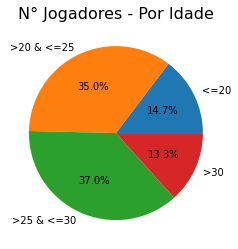

In [ ]:
#visualizando esses dados
x = np.array([abaixo20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above30['Name'].count()])  
mylabels = ['<=20','>20 & <=25','>25 & <=30','>30']
plt.title('N° Jogadores - Por Idade',fontsize=16)
plt.pie(x,labels=mylabels,autopct='%.1f%%')
plt.show()

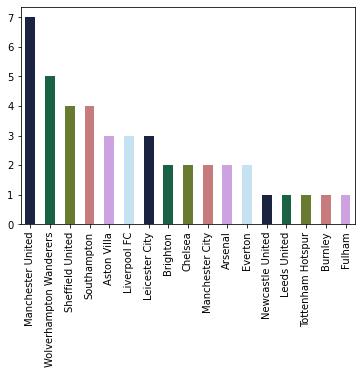

In [ ]:
#total under 20 players in each club

players_under_20 = df[df['Age']<20]
players_under_20['Club'].value_counts().plot(kind='bar',color= sns.color_palette('cubehelix'))

In [ ]:
#abaixo20 - jogadores do manchester
players_under_20[players_under_20['Club']=='Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,"83,1",0,0,"0,37","0,09",2,0,58,0.225806
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,"85,7",0,0,"0,05","0,01",0,0,47,0.000000
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,"84,4",0,0,"0,02","0,26",0,0,55,0.000000
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,"81,1",0,0,"0,16","0,02",0,0,77,0.500000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75,0,0,0,0,0,0,5,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100,0,0,0,0,0,0,9,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0.000000


In [ ]:
#abaixo20 - jogadores do chelsea
players_under_20[players_under_20['Club']=='Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,"82,2",0,0,"0,12","0,26",0,0,46,0.086957
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,"89,3",0,0,"0,01","0,04",0,0,52,0.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

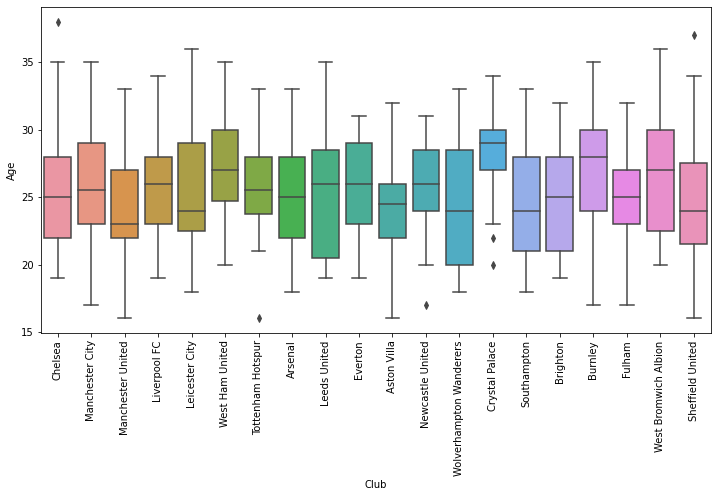

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Club',y='Age',data=df)
plt.xticks(rotation=90) 

In [ ]:
# numero de jogadores por club
num_player = df.groupby('Club').size()
#soma das idades dividida pelo numero de jogadores
data = (df.groupby('Club')['Age'].sum()) / num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

Text(0.5, 1.0, 'Plot dos clubs vs Total Assists')

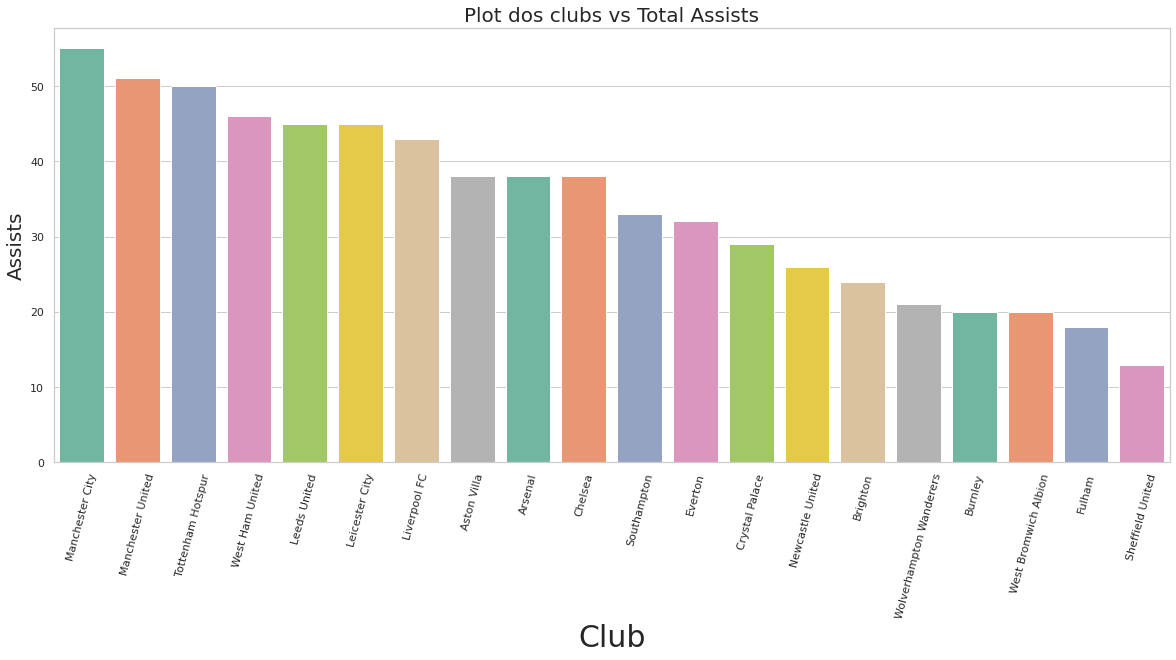

In [ ]:
assist_by_clubs = pd.DataFrame(df.groupby('Club',as_index=False)['Assists'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club',y='Assists',data=assist_by_clubs.sort_values(by='Assists',ascending=False),palette='Set2')  
ax.set_xlabel('Club',fontsize=30)
ax.set_ylabel('Assists',fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Plot dos clubs vs Total Assists',fontsize=20)

In [ ]:
#top 10 players with most assists
#mostrar um dataframe com nome, club,numero de assitencias e partidas dos 10 maiores das coluna assistencia
top_assist = df[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top_assist

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Text(0.5, 1.0, 'plotar clubes vs total goals')

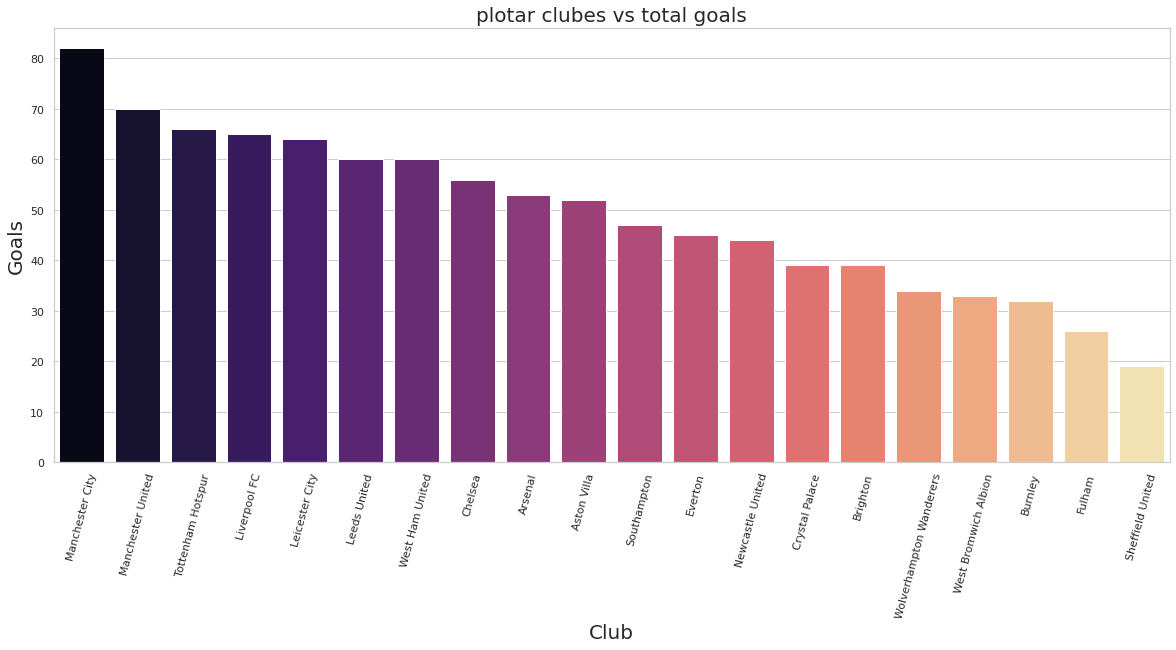

In [ ]:
goals_by_clubs = pd.DataFrame(df.groupby('Club',as_index=False)['Goals'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club',y='Goals',data=goals_by_clubs.sort_values(by='Goals',ascending=False),palette='magma')
ax.set_xlabel('Club',fontsize=20)
ax.set_ylabel('Goals',fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('plotar clubes vs total goals',fontsize=20)

In [ ]:
#top 10 players with most goals
#mostrar um dataframe com nome, club,numero de goals e partidas dos 10 maiores das coluna goal
top_goal = df[['Name','Club','Goals','Matches']].nlargest(n=10,columns='Goals')
top_goal

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,?lkay Gündo?an,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [ ]:
#gols por partida
top_goal_partida = df[['Name','Club','Goals','Matches','GoalsPerMatch']].nlargest(n=10,columns='GoalsPerMatch')
top_goal_partida

,Name,Club,Goals,Matches,GoalsPerMatch
162,Harry Kane,Tottenham Hotspur,23,35,0.657143
81,Mohamed Salah,Liverpool FC,22,37,0.594595
307,Joe Willock,Newcastle United,8,14,0.571429
145,Jesse Lingard,West Ham United,9,16,0.562500
175,Gareth Bale,Tottenham Hotspur,11,20,0.550000
74,Anthony Elanga,Manchester United,1,2,0.500000
51,Bruno Fernandes,Manchester United,18,37,0.486486
237,Dominic Calvert-Lewin,Everton,16,33,0.484848
120,Kelechi Iheanacho,Leicester City,12,25,0.480000
92,Diogo Jota,Liverpool FC,9,19,0.473684


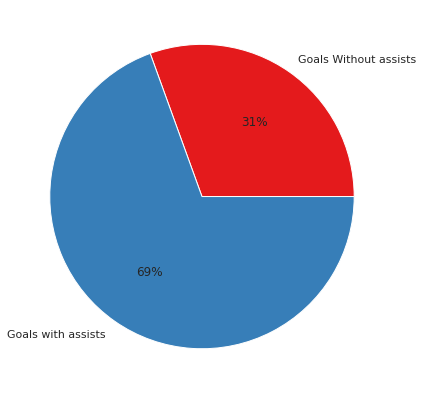

In [ ]:
#gols com assistencia
plt.figure(figsize=(14,7))
assists = df['Assists'].sum()
data=[total_goals-assists,assists]
labels=['Goals Without assists','Goals with assists']
color=sns.color_palette('Set1')

plt.pie(data,labels=labels,colors=color,autopct='%.0f%%')
plt.show()

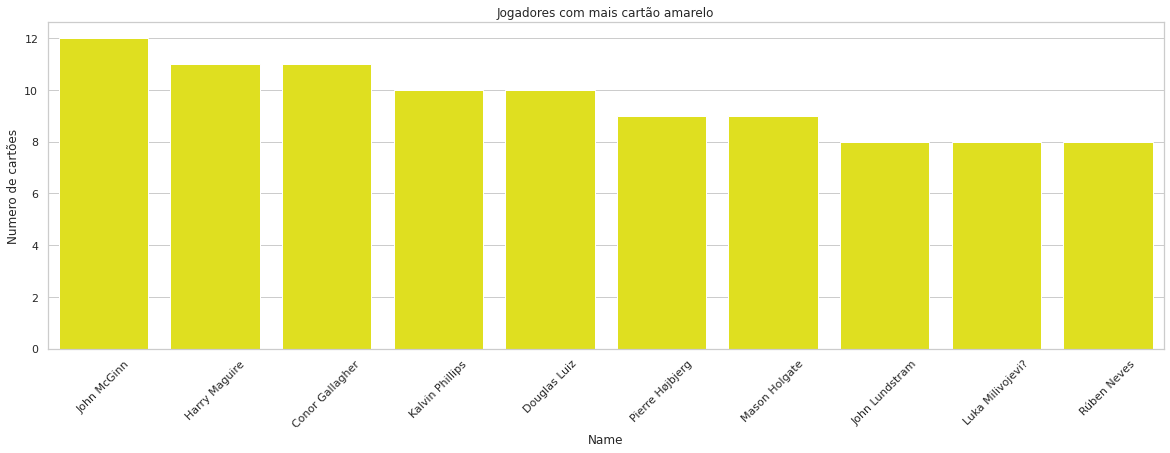

In [ ]:
#top 10 jogadores com mais cartão amarelo
#vamos ordenar do maior pro menor o dataset, sendo ele inteiro somente nas 10 linhas
amarelo = df.sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Jogadores com mais cartão amarelo')
c = sns.barplot(x=amarelo['Name'],y=amarelo['Yellow_Cards'],label='Players',color='yellow')
plt.ylabel('Numero de cartões')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c

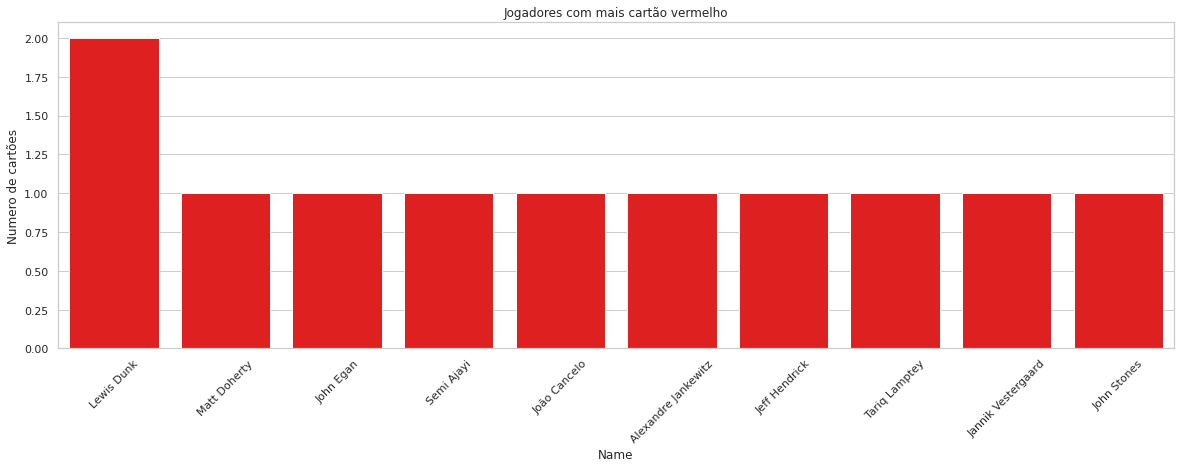

In [ ]:
#top 10 jogadores com mais cartão vermelho
#vamos ordenar do maior pro menor o dataset, sendo ele inteiro somente nas 10 linhas
vermelho = df.sort_values(by='Red_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Jogadores com mais cartão vermelho')
c = sns.barplot(x=vermelho['Name'],y=vermelho['Red_Cards'],label='Players',color='red')
plt.ylabel('Numero de cartões')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c